# THỐNG KÊ DỮ LIỆU

1. Yêu cầu chung: Thống kê được số lượng ảnh trong từng phân loại mà mỗi SV đóng góp

2. Yêu cầu cụ thể:
- Input:
    + Thư mục cha chứa các thư mục con - mỗi thư mục con tương ứng với tên của từng hiệu xe (Honda, Suzuki, VinFast, Others). Ví dụ: https://drive.google.com/drive/u/1/folders/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra
    + Các ảnh được đặt tên theo quy ước: các tập tin ảnh theo quy ước https://colab.research.google.com/drive/1bUmXMM_ggnEXKo2qylfe6h0JnQuos-8_
- Output:
    + File CarDataset-1.csv - Thống kê số lượng ảnh theo từng SV
      + Mỗi dòng sẽ có các thông tin cách nhau bằng dấu phẩy, theo quy ước: MSSV, All, Số lượng.
        
        Ví dụ: 20221234, All, 1.2
      + Số lượng có thể là số thực vì một ảnh có thể có đóng góp từ nhiều sinh viên
    + File CarDataset-2.csv - Thống kê số lượng ảnh theo từng Hiệu xe mà từng SV đóng góp
      + Mỗi dòng sẽ có các thông tin cách nhau bằng dấu phẩy, theo quy ước: MSSV, Hiệu xe, Số lượng.
        
        Ví dụ: 20221234, Honda, 1.2
      + Số lượng có thể là số thực vì một ảnh có thể có đóng góp từ nhiều sinh viên
      + Chỉ chấp nhận file .jpg, .jpeg và .png
3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline: 17:00 - ??/??/2024

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.


## Thông tin của tác giả, ngày cập nhật
Thành viên nhóm:


*   Tăng Gia Hân - 22520394
*   Tăng Mỹ Hân - 22520395


Ngày cập nhật: 15/12/2024
 

# Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS114/DoAn

/content/drive/MyDrive/CS114/DoAn


In [ ]:
import os
import re
import csv
from collections import defaultdict

# Đường dẫn đến thư mục gốc
data_folder = "/content/drive/MyDrive/CS114/Public"

# Khởi tạo các bộ đếm
sv_car_count = defaultdict(lambda: defaultdict(float))  # Thống kê ảnh theo hiệu xe và SV
processed_files = set() # Lưu trữ các file đã xử lý để tránh trùng lặp

# Chấp nhận các định dạng file ảnh
valid_extensions = {".jpg", ".jpeg", ".png"}

# Duyệt qua từng thư mục con (hiệu xe)
for car_brand in os.listdir(data_folder):
  car_brand_path = os.path.join(data_folder, car_brand)
  if os.path.isdir(car_brand_path):
    print(car_brand_path)
    for filename in os.listdir(car_brand_path):
      # Kiểm tra định dạng file hợp lệ
      if any(filename.lower().endswith(ext) for ext in valid_extensions):
        file_path = os.path.join(car_brand_path, filename)
        if file_path not in processed_files:  # Tránh trùng lặp
          processed_files.add(file_path)
        # Trích xuất thông tin từ tên file
          match = re.match(r"([\d-]+)\.[\w]+\.\d+", filename)
          if match:
            mssv_list = match.group(1).split("-") # Danh sách MSSV từ tên file
            contribution = 1.0 / len(mssv_list) # Đóng góp chia đều cho các SV
            for mssv in mssv_list:
              sv_car_count[mssv][car_brand] += contribution

# Tính tổng số lượng từ thống kê chi tiết
sv_total_count = {mssv: sum(car_dict.values()) for mssv, car_dict in sv_car_count.items()}

# Ghi file CarDataset-1.csv (thống kê tổng số lượng ảnh theo SV)
with open("CarDataset-1.csv", "w", newline="", encoding='utf-8') as csvfile1:
  writer = csv.writer(csvfile1)
  writer.writerow(["MSSV", "All", "Số lượng"])
  for mssv, total in sv_total_count.items():
    writer.writerow([mssv, "All", round(total, 2)])

# Ghi file CarDataset-2.csv (thống kê số lượng ảnh theo hiệu xe và SV)
with open("CarDataset-2.csv", "w", newline="", encoding='utf-8') as csvfile2:
  writer = csv.writer(csvfile2)
  writer.writerow(["MSSV", "Hiệu xe", "Số lượng"])
  for mssv, car_dict in sv_car_count.items():
    for car_brand, count in car_dict.items():
      writer.writerow([mssv, car_brand, round(count, 2)])

print("Đã tạo file CarDataset-1.csv và CarDataset-2.csv thành công!")

/content/drive/MyDrive/CS114/Public/Mazda
/content/drive/MyDrive/CS114/Public/Mitsubishi
/content/drive/MyDrive/CS114/Public/Suzuki
/content/drive/MyDrive/CS114/Public/Toyota
/content/drive/MyDrive/CS114/Public/Hyundai
/content/drive/MyDrive/CS114/Public/KIA
/content/drive/MyDrive/CS114/Public/VinFast
/content/drive/MyDrive/CS114/Public/Others
/content/drive/MyDrive/CS114/Public/Honda
Đã tạo file CarDataset-1.csv và CarDataset-2.csv thành công!


In [ ]:
import pandas as pd
df1 = pd.read_csv('CarDataset-1.csv')
df2 = pd.read_csv('CarDataset-2.csv')

In [ ]:
df1.head()

,MSSV,All,Số lượng
0,22520779,All,1365.0
1,22521587,All,1365.0
2,22521425,All,73.0
3,22520318,All,73.0
4,22521492,All,378.0


In [ ]:
df2.head(20)

,MSSV,Hiệu xe,Số lượng
0,22520779,Mazda,193.5
1,22520779,Mitsubishi,55.5
2,22520779,Suzuki,52.5
3,22520779,Toyota,41.0
4,22520779,Hyundai,186.5
5,22520779,KIA,175.5
6,22520779,VinFast,51.0
7,22520779,Others,509.5
8,22520779,Honda,100.0
9,22521587,Mazda,193.5


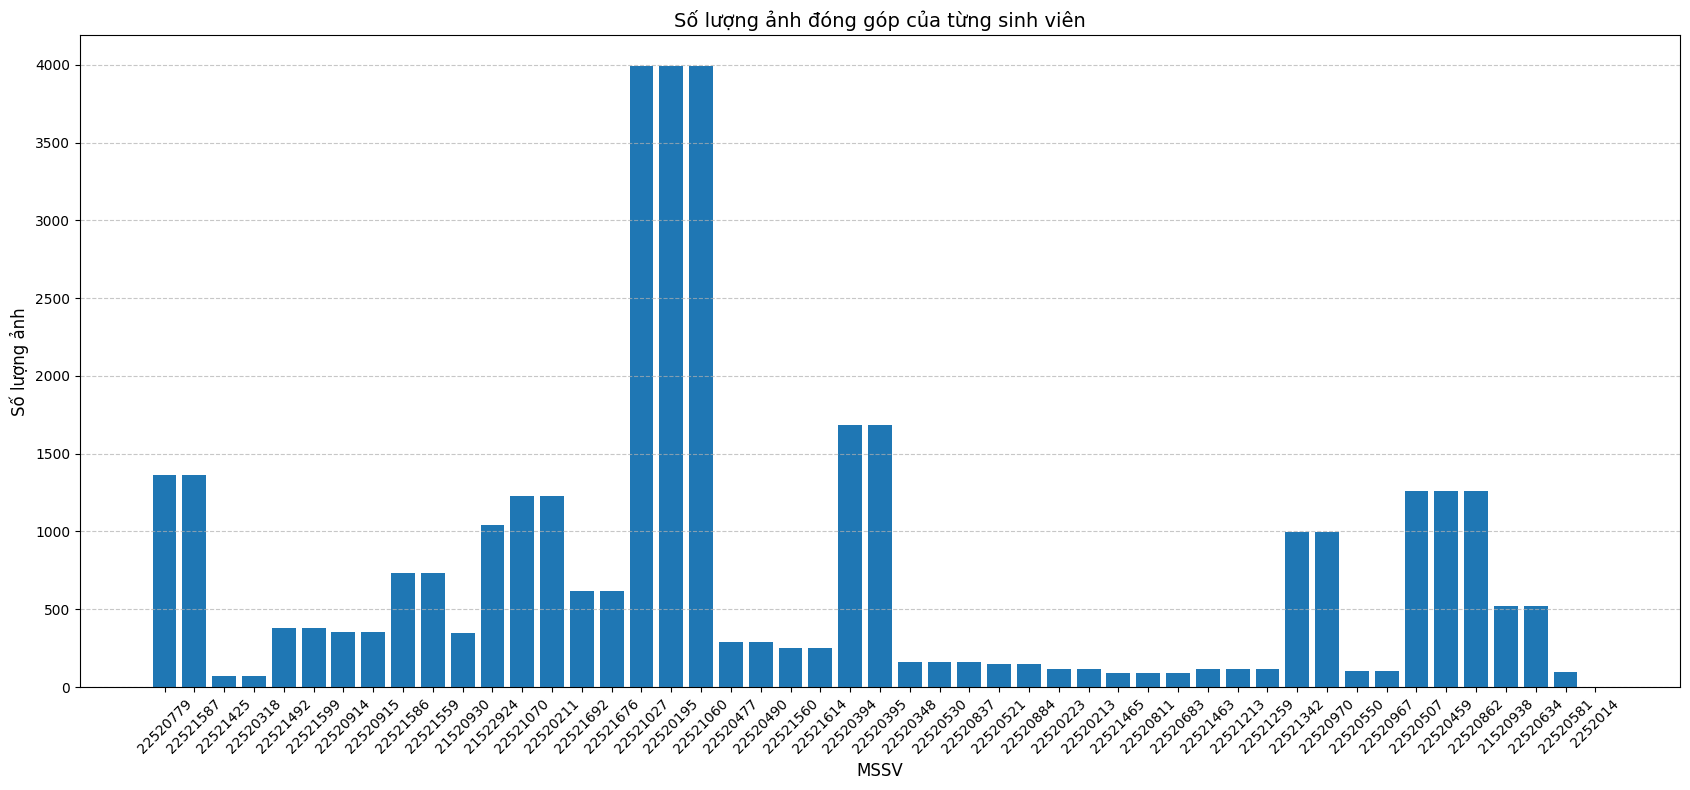

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ thanh
plt.figure(figsize=(17, 8))
plt.bar(df1['MSSV'].astype(str), df1['Số lượng'])
plt.title('Số lượng ảnh đóng góp của từng sinh viên', fontsize=14)
plt.xlabel('MSSV', fontsize=12)
plt.ylabel('Số lượng ảnh', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

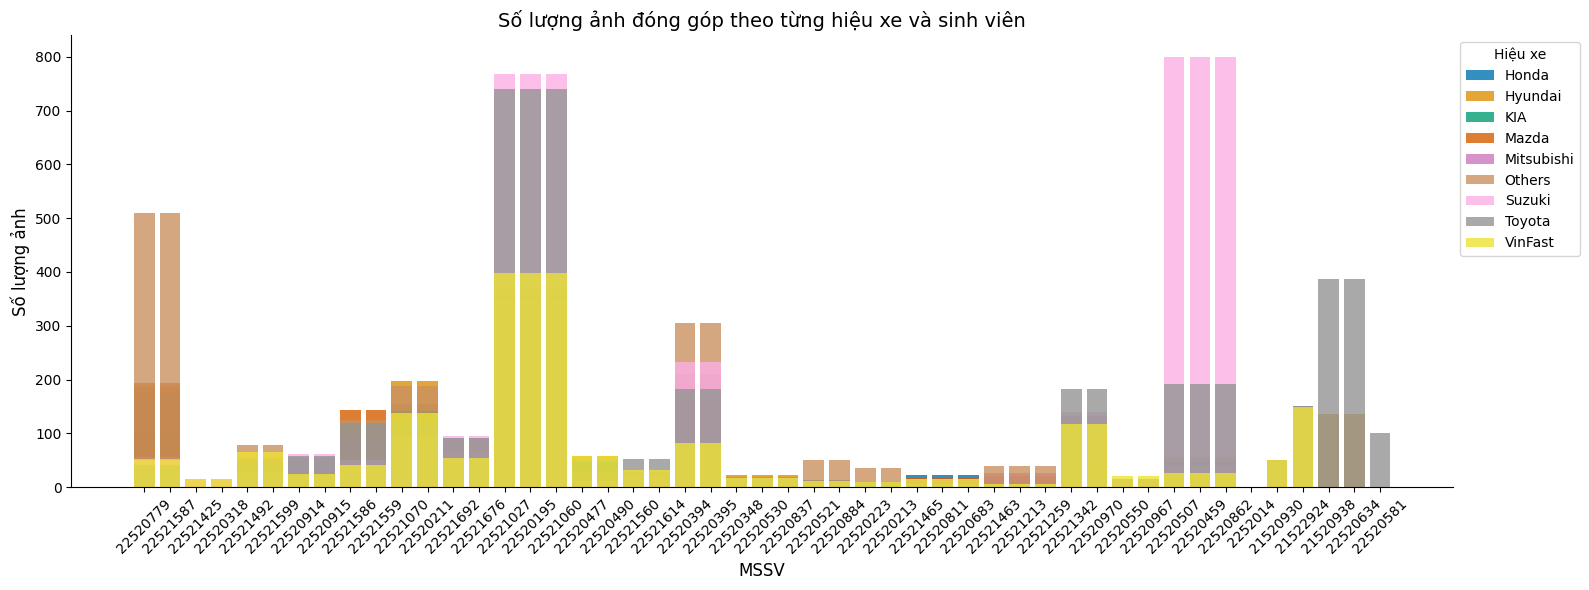

In [ ]:
import seaborn as sns

# Plot setup
df_sorted = df2.sort_values('MSSV', ascending=True)

# Chuyển đổi biểu đồ thành dạng cột
fig, ax = plt.subplots(figsize=(16, 6))
palette = sns.color_palette('colorblind')

# Plot mỗi hiệu xe thành một cụm cột
for i, (series_name, series) in enumerate(df2.groupby('Hiệu xe')):
    xs = series['MSSV'].astype(str)  # Chuyển MSSV thành chuỗi
    ys = series['Số lượng']
    ax.bar(xs, ys, label=series_name, color=palette[i % len(palette)], alpha=0.8)

# Thêm legend, nhãn và thẩm mỹ
ax.legend(title='Hiệu xe', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSSV', fontsize=12)
plt.ylabel('Số lượng ảnh', fontsize=12)
plt.title('Số lượng ảnh đóng góp theo từng hiệu xe và sinh viên', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
